In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
import os

# Define the file path
file_path = '/content/gdrive/MyDrive/Egyptian_id_data_extractor'

# Define the folder name
folder_name = "Egyptian_id_data_extractor"

# Check if the folder exists
if os.path.isdir(folder_name):
    print(f"The folder '{folder_name}' already exists.")
else:
    # Create the folder
    os.makedirs(folder_name)
    print(f"The folder '{folder_name}' has been created.")
%cd Egyptian_id_data_extractor


The folder 'Egyptian_id_data_extractor' has been created.
/content/gdrive/MyDrive/Egyptian_id_data_extractor


In [2]:
%cd Egyptian_id_data_extractor


/content/gdrive/MyDrive/Egyptian_id_data_extractor


In [3]:
!pip install ultralytics
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 47.4 MB/s eta 0:00:00


In [ ]:
!pip install roboflow
from roboflow import Roboflow


# Model Training

In [4]:
!pwd

/content/gdrive/MyDrive/Egyptian_id_data_extractor


In [5]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/gdrive/MyDrive/Egyptian_id_data_extractor/Dataset/data.yaml epochs=100 imgsz=360 plots=True

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/gdrive/MyDrive/Egyptian_id_data_extractor/Dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=360, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

In [6]:
!ls /content/gdrive/MyDrive/Egyptian_id_data_extractor/runs/detect/train/

args.yaml					    labels_correlogram.jpg  weights
events.out.tfevents.1725018772.50cdc878cf48.5895.0  labels.jpg


/content/gdrive/MyDrive/Egyptian_id_data_extractor


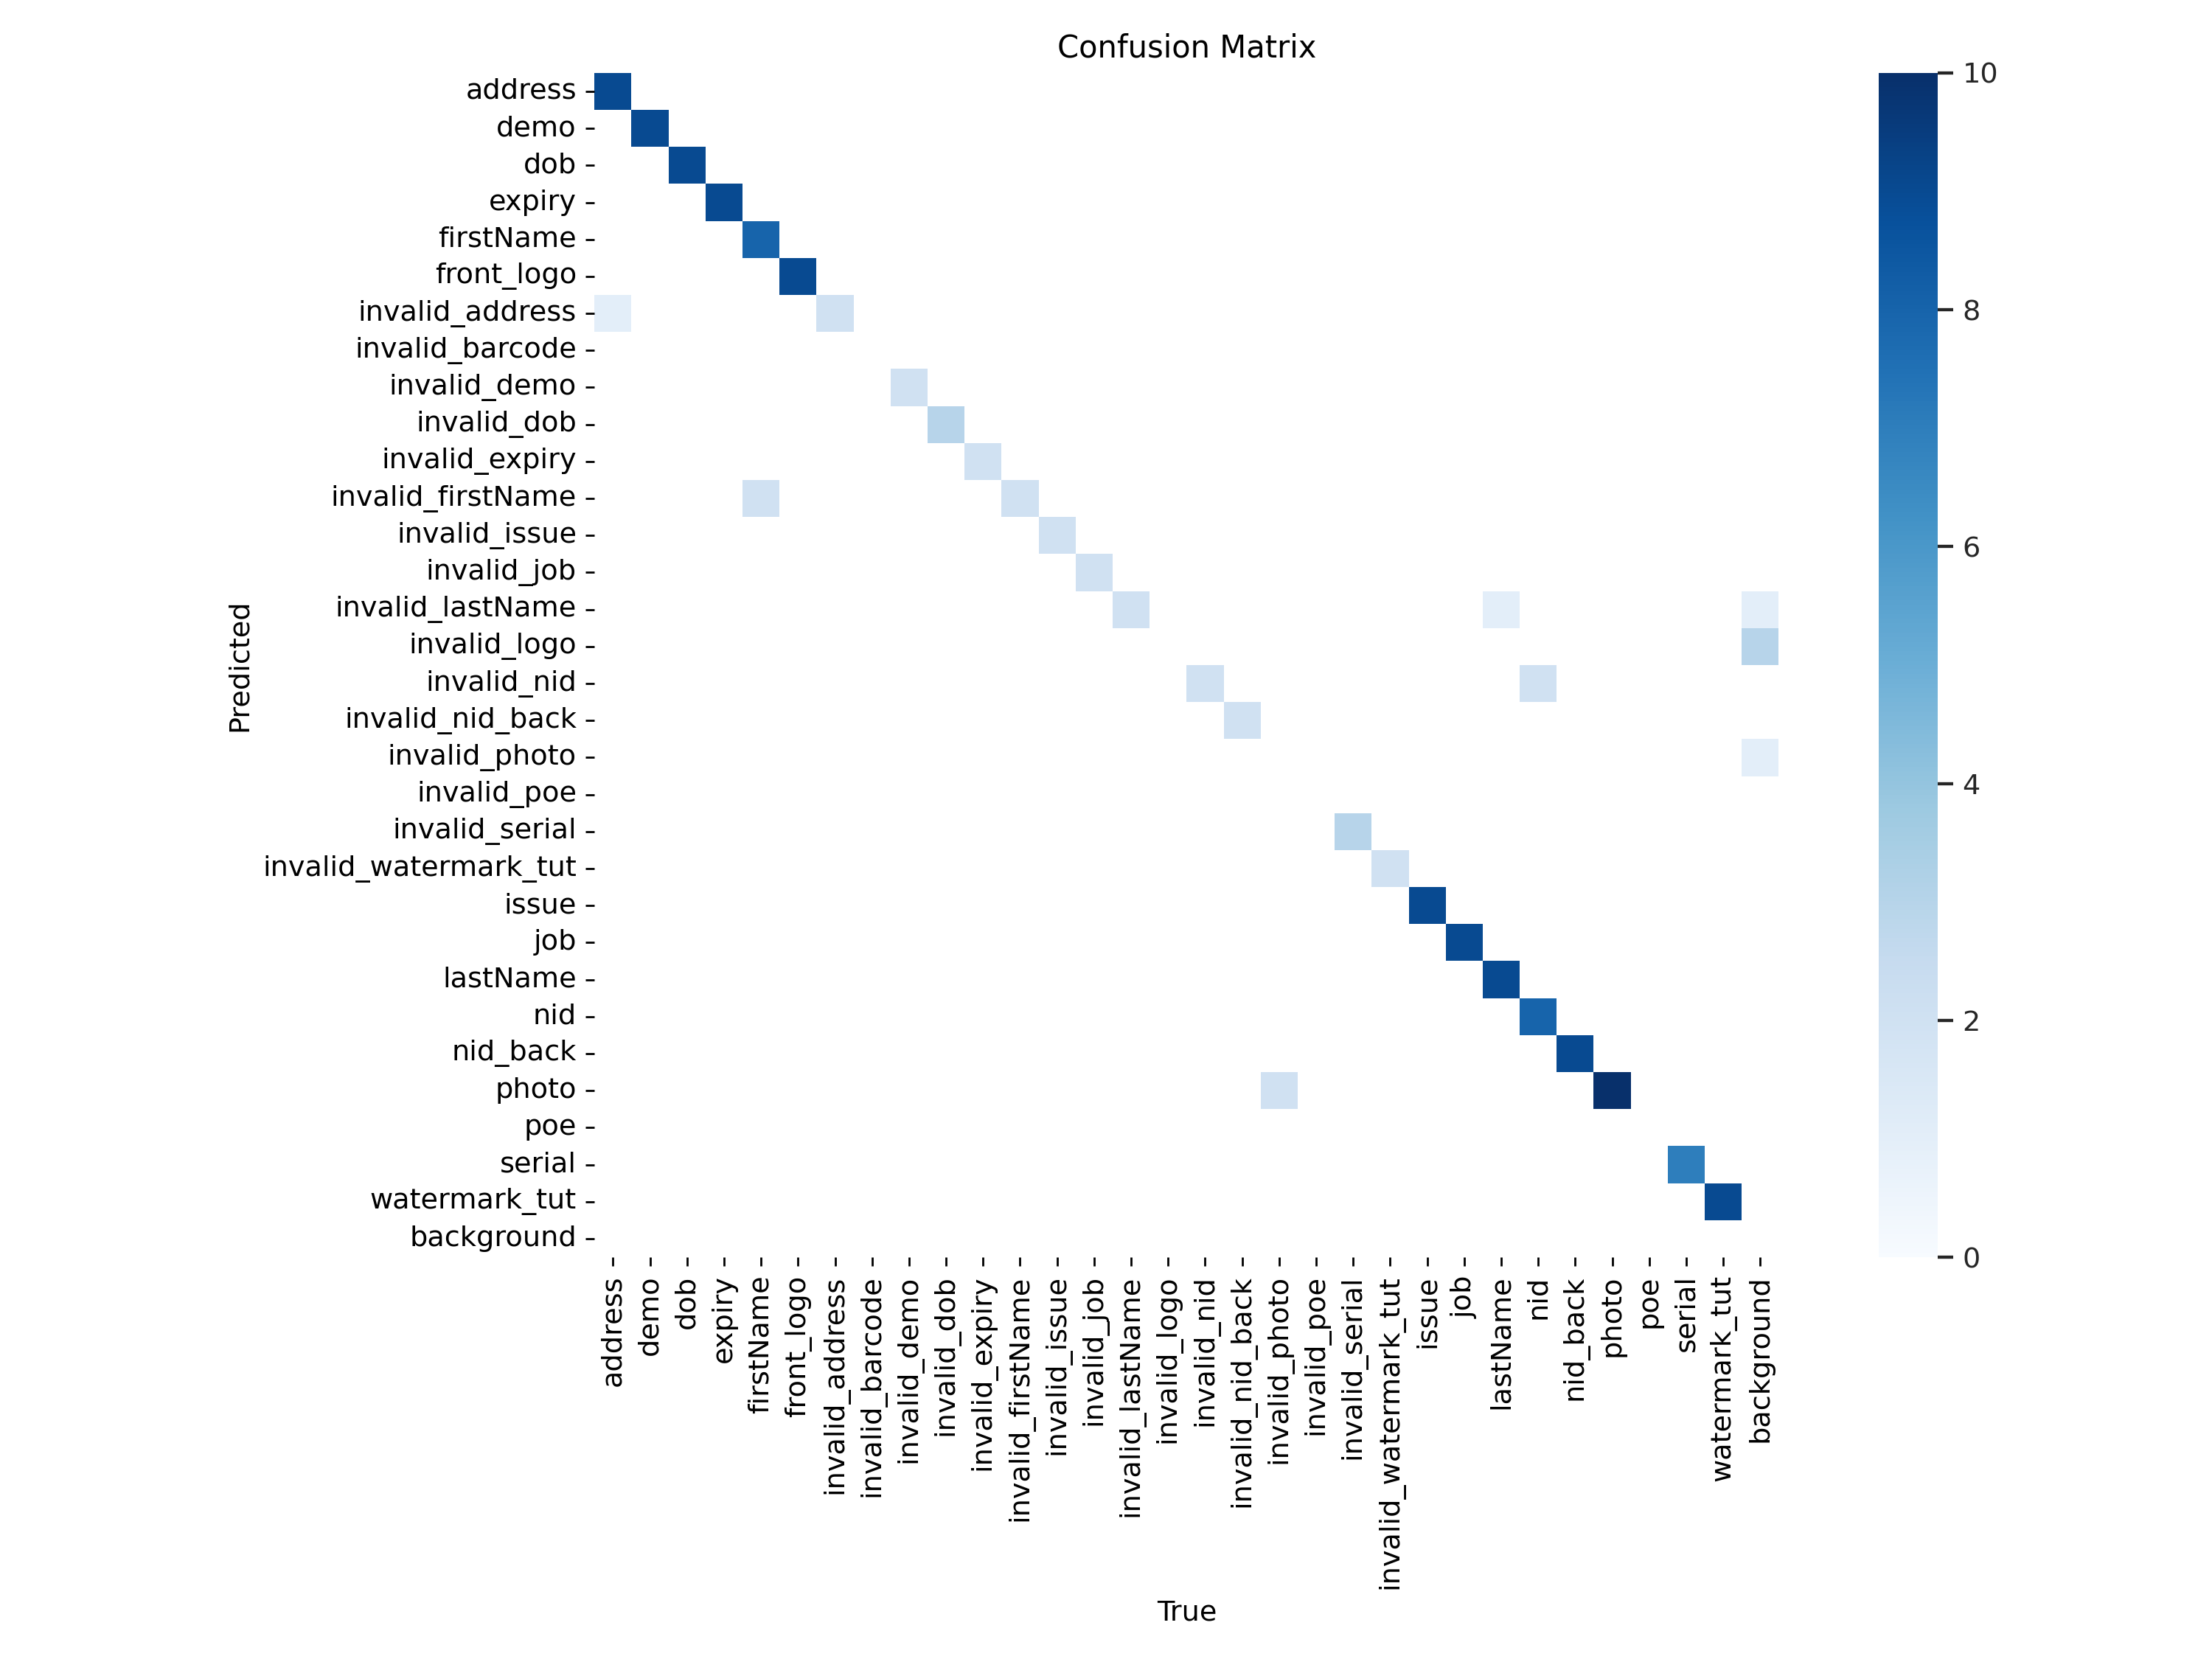

In [11]:
%cd /content/gdrive/MyDrive/Egyptian_id_data_extractor
from IPython.display import Image

# Display the image
Image(filename='/content/gdrive/MyDrive/Egyptian_id_data_extractor/runs/detect/train3/confusion_matrix.png', width=600)


/content/gdrive/MyDrive/Egyptian_id_data_extractor


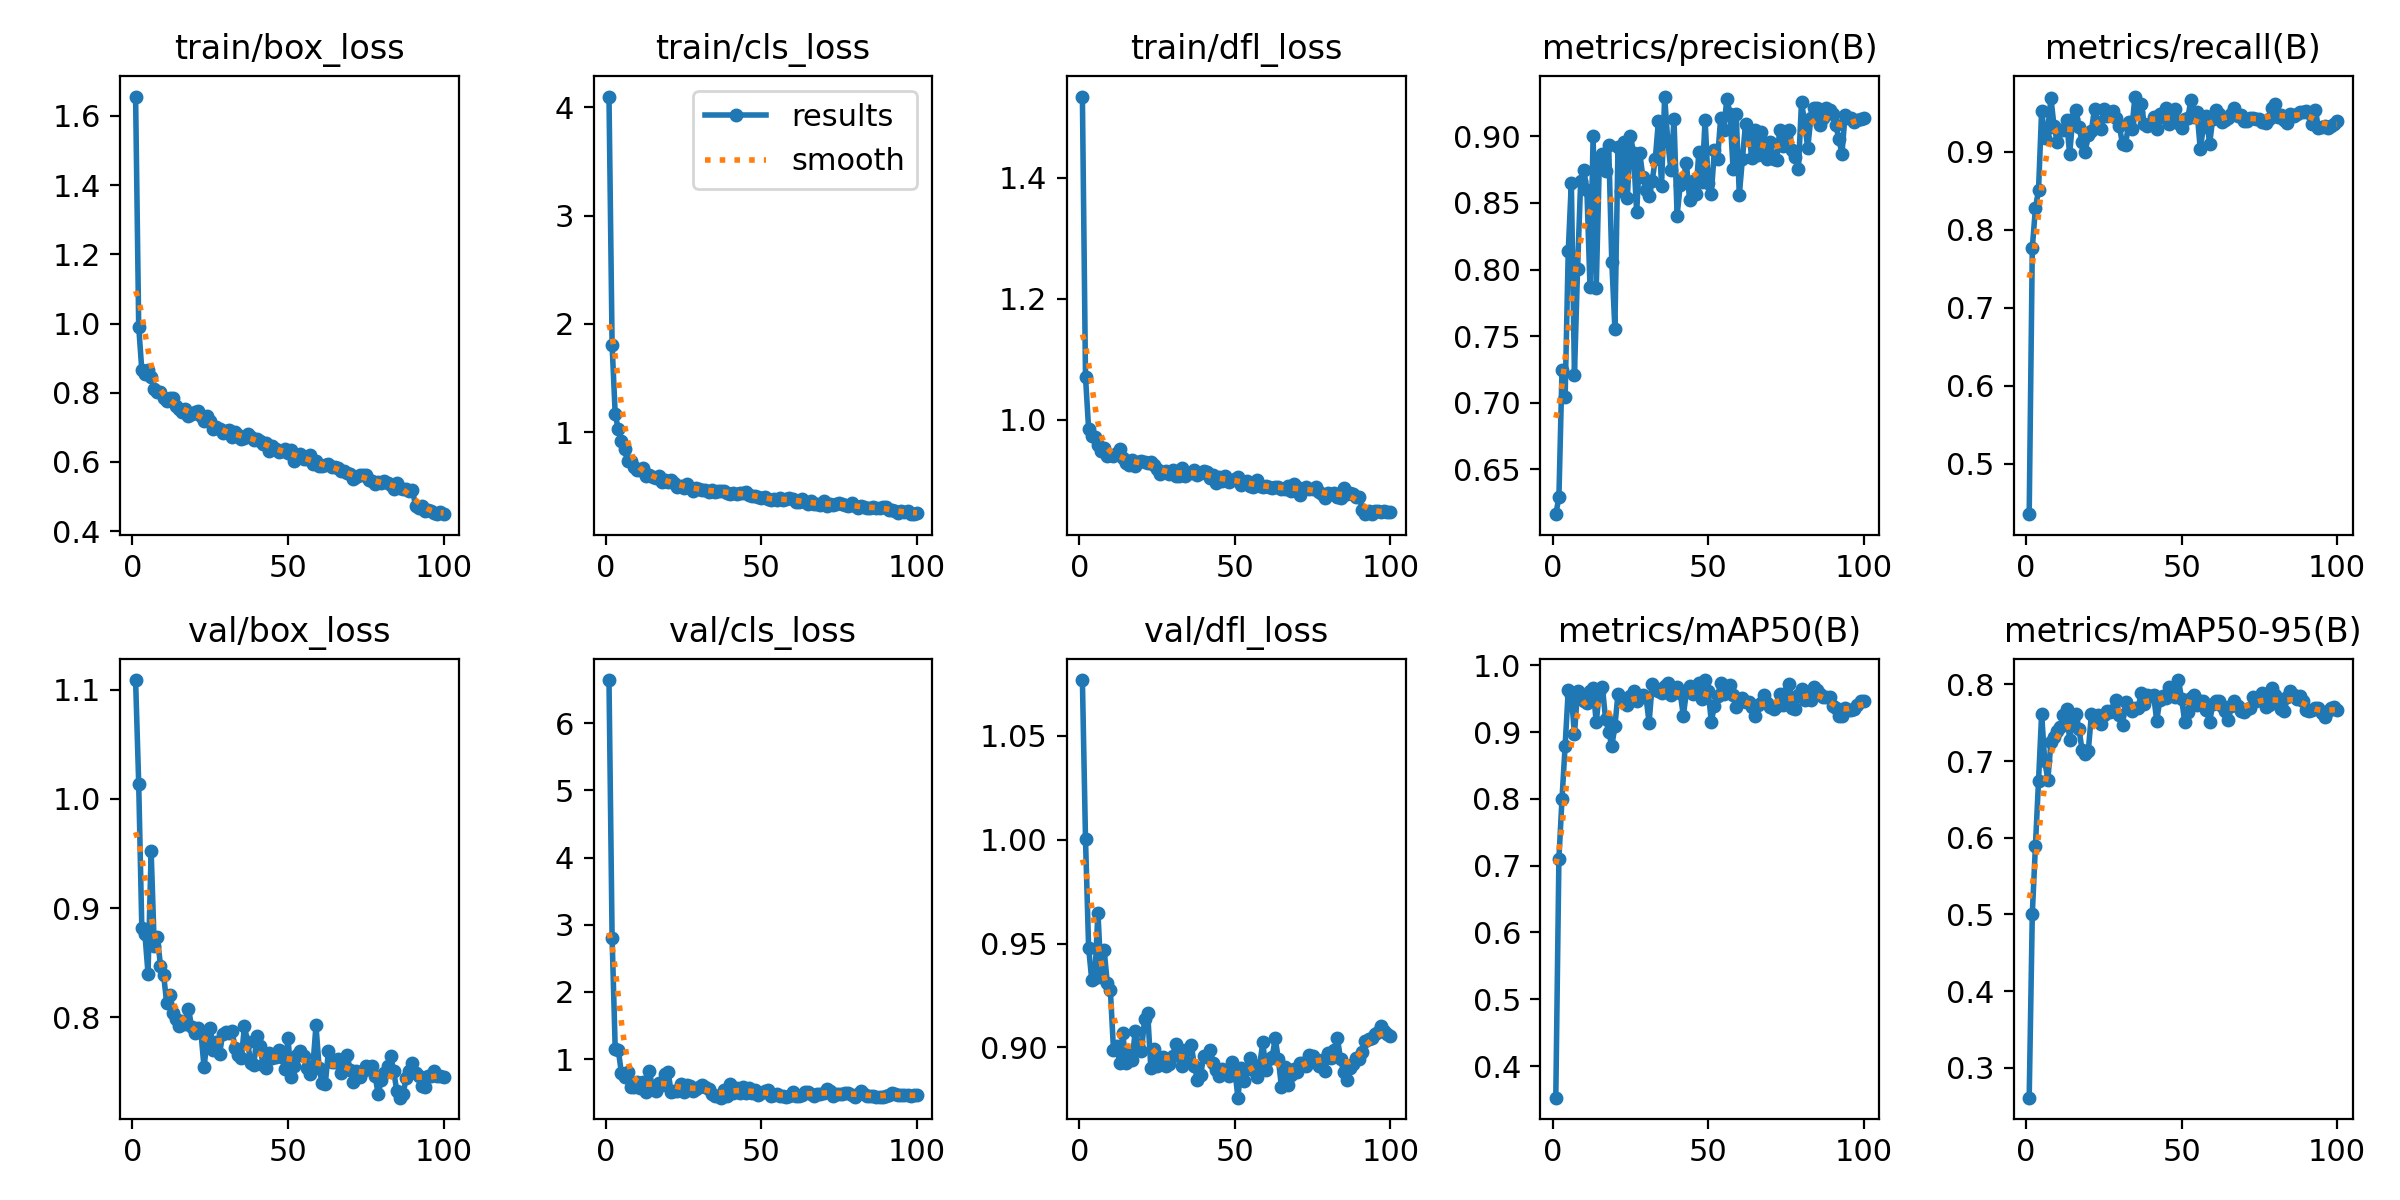

In [13]:
%cd /content/gdrive/MyDrive/Egyptian_id_data_extractor
from IPython.display import Image


Image(filename=f'/content/gdrive/MyDrive/Egyptian_id_data_extractor/runs/detect/train3/results.png', width=600)

/content/gdrive/MyDrive/Egyptian_id_data_extractor


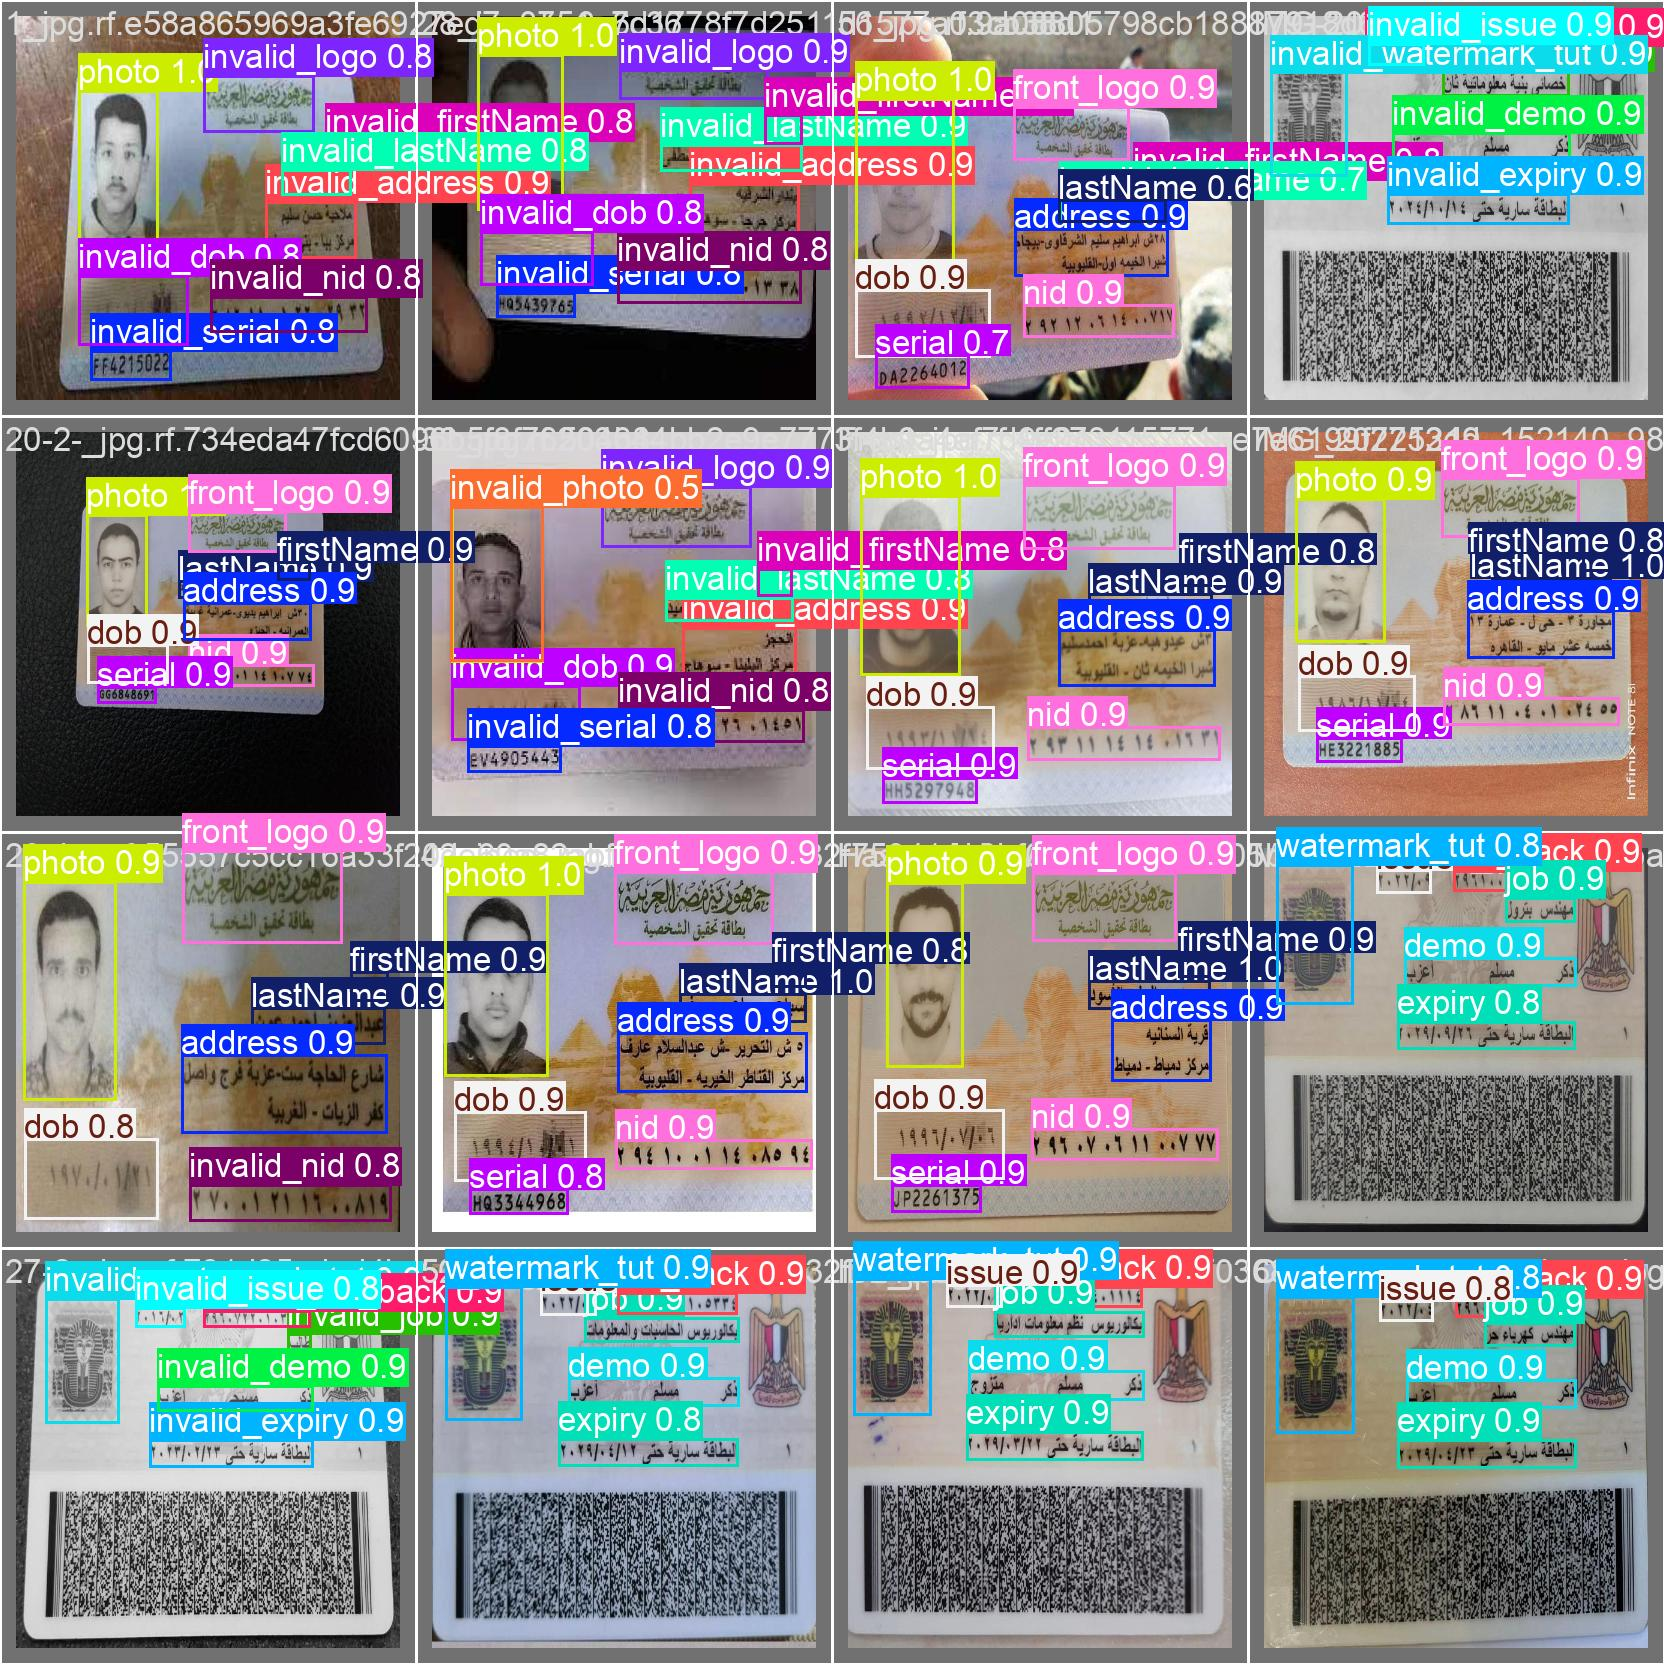

In [14]:
%cd /content/gdrive/MyDrive/Egyptian_id_data_extractor
from IPython.display import Image


Image(filename=f'/content/gdrive/MyDrive/Egyptian_id_data_extractor/runs/detect/train3/val_batch0_pred.jpg', width=600)

# Validate Custom Model

In [17]:
%cd /content/gdrive/MyDrive/Egyptian_id_data_extractor

!yolo task=detect mode=val model=/content/gdrive/MyDrive/Egyptian_id_data_extractor/runs/detect/train3/weights/best.pt data=/content/gdrive/MyDrive/Egyptian_id_data_extractor/Dataset/data.yaml

/content/gdrive/MyDrive/Egyptian_id_data_extractor
Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,630,509 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning /content/gdrive/MyDrive/Egyptian_id_data_extractor/Dataset/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.08s/it]
                   all         23        157      0.913      0.937      0.978      0.804
               address         10         10          1      0.915      0.995      0.854
                  demo          9          9      0.985          1      0.995      0.793
                   dob          9          9       0.99          1      0.995      0.814
                expiry          9          9      0.993          1      0.995      0.908
             firstName         10         10     

# Test

In [18]:
!yolo task=detect mode=predict model=/content/gdrive/MyDrive/Egyptian_id_data_extractor/runs/detect/train3/weights/best.pt conf=0.4 source=/content/gdrive/MyDrive/Egyptian_id_data_extractor/Dataset/test/images save=True

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,630,509 parameters, 0 gradients, 164.9 GFLOPs

image 1/12 /content/gdrive/MyDrive/Egyptian_id_data_extractor/Dataset/test/images/15-2-_jpg.rf.9e7d02144c3ccbc294a9c6ee9c6bbeb7.jpg: 384x384 1 address, 1 dob, 1 firstName, 1 front_logo, 1 lastName, 1 nid, 1 photo, 1 serial, 31.0ms
image 2/12 /content/gdrive/MyDrive/Egyptian_id_data_extractor/Dataset/test/images/20220817_140950_jpg.rf.43e87d53935d991e2759c835756b0e05.jpg: 384x384 1 address, 1 dob, 1 firstName, 1 front_logo, 1 lastName, 1 nid, 1 photo, 1 serial, 31.1ms
image 3/12 /content/gdrive/MyDrive/Egyptian_id_data_extractor/Dataset/test/images/25-2-_jpg.rf.e1e1a8181dc080129d8dab1a215be537.jpg: 384x384 1 invalid_demo, 1 invalid_expiry, 1 invalid_issue, 1 invalid_job, 1 invalid_nid_back, 1 invalid_watermark_tut, 31.0ms
image 4/12 /content/gdrive/MyDrive/Egyptian_id_data_extractor/Dataset/test/images/30_jpg.rf.6ee8f

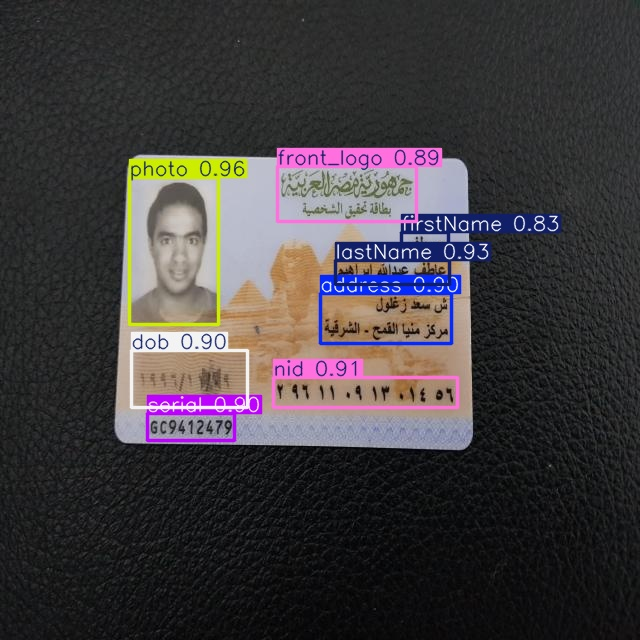

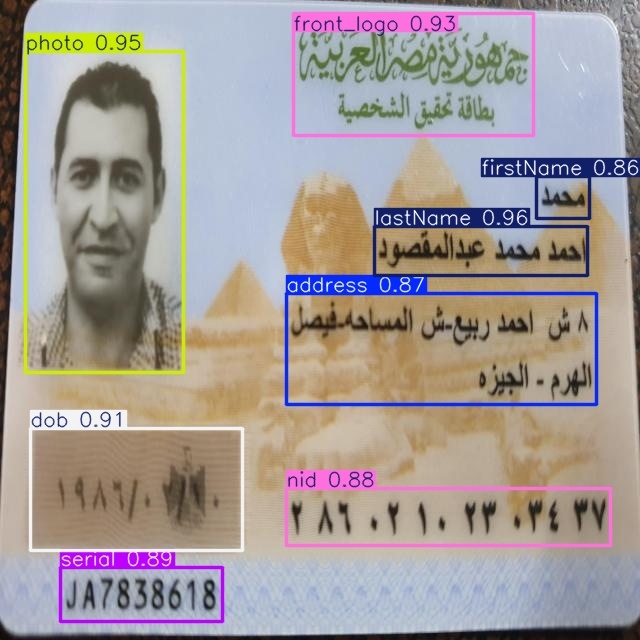

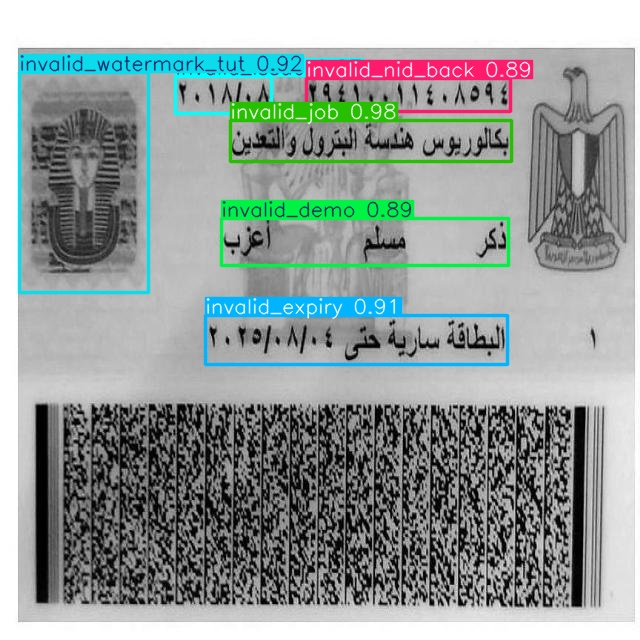

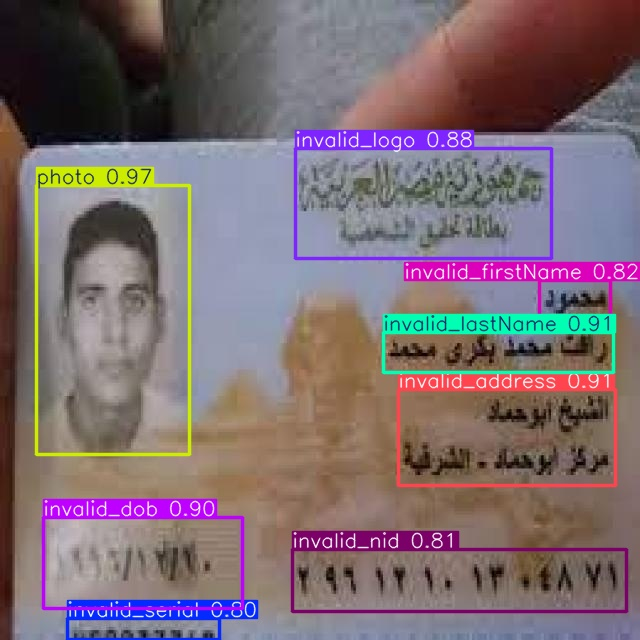

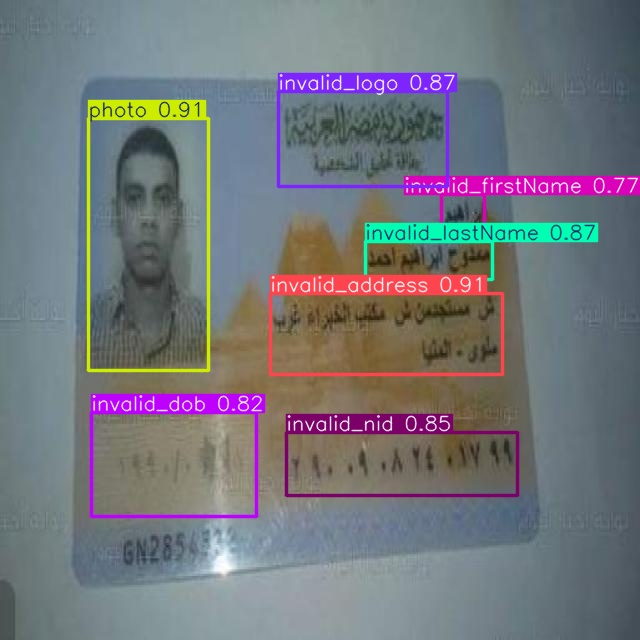

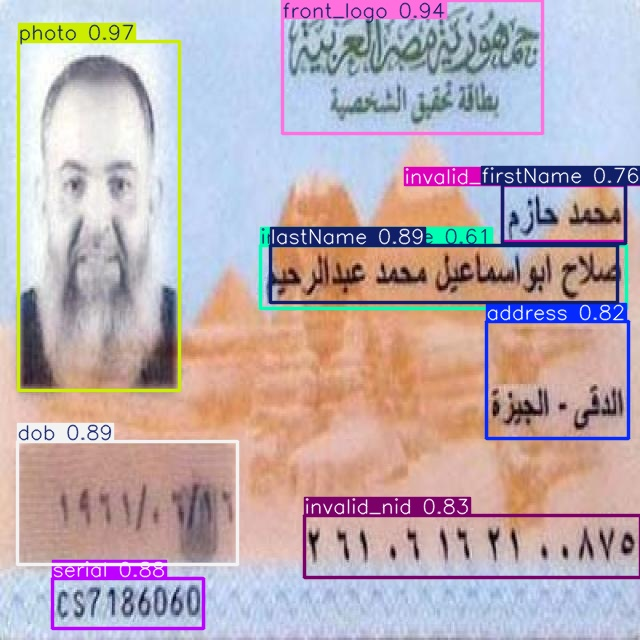

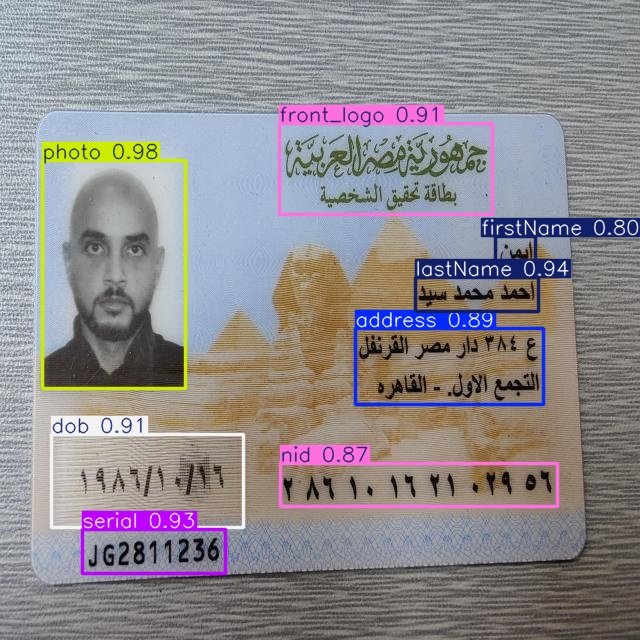

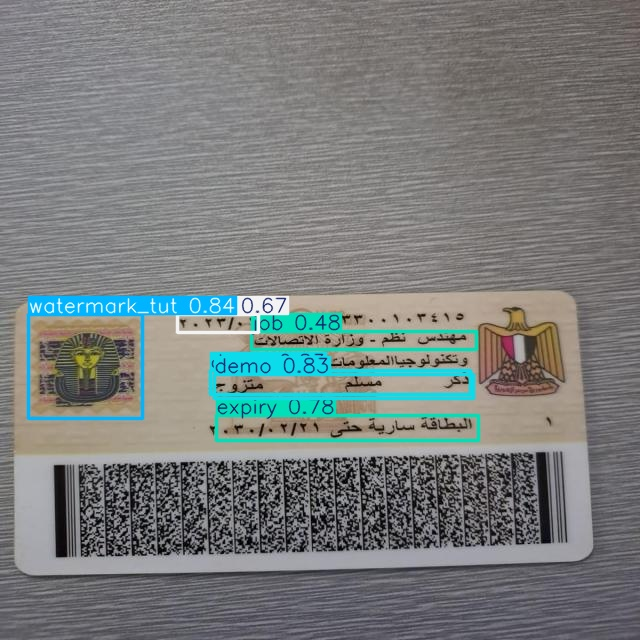

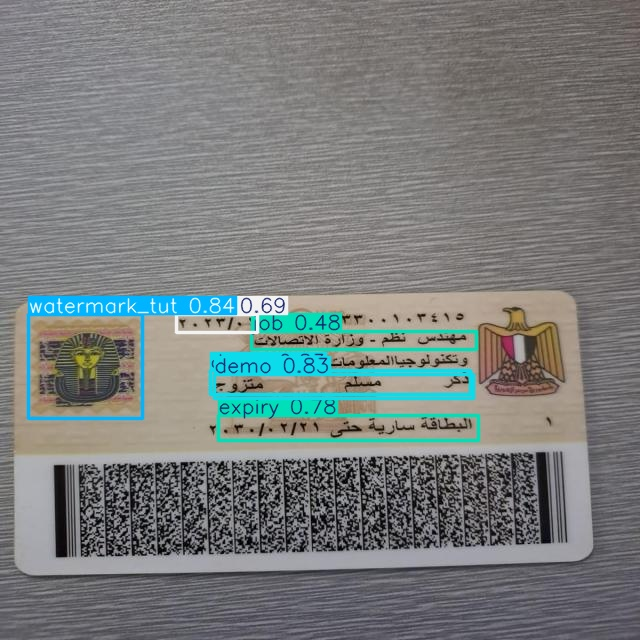

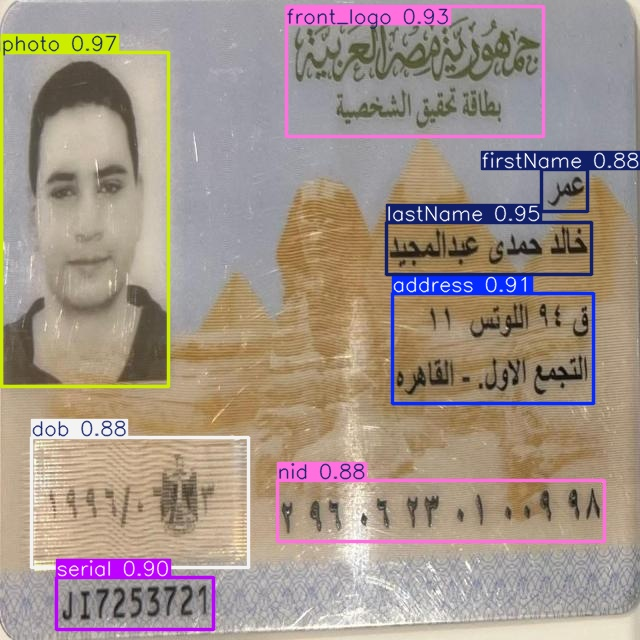

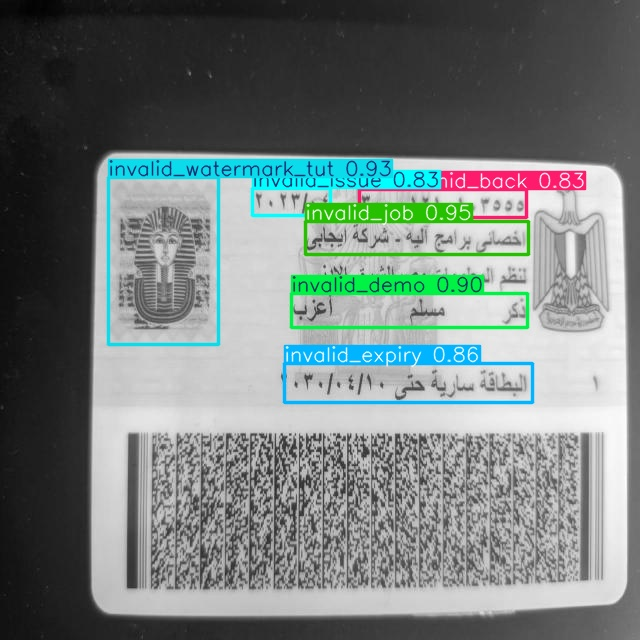

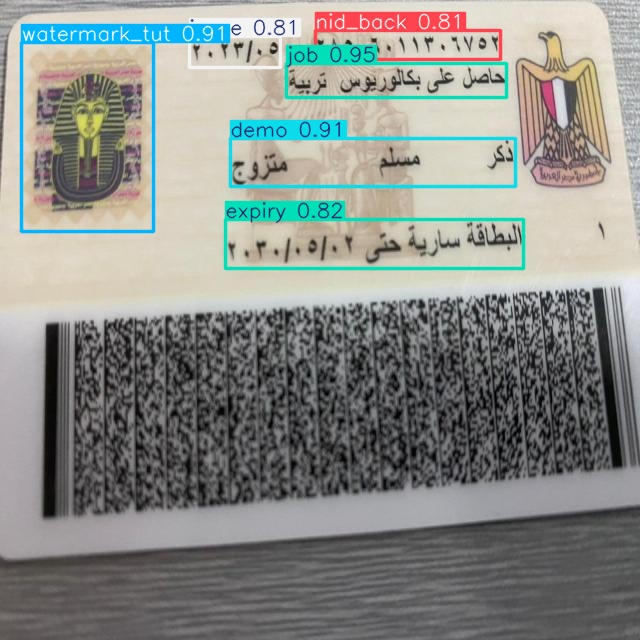

In [20]:
import os
from IPython.display import Image, display

# Define the directory containing the images
image_dir = '/content/gdrive/MyDrive/Egyptian_id_data_extractor/runs/detect/predict'

# Get a list of all files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('png', 'jpg', 'jpeg'))]

# Loop over the image files and display each one
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    display(Image(filename=image_path, width=600))
